In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import re

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]

In [9]:
class GpsLocation():
    def __init__(self, lat, lon, altitude):
        self._lat = lat
        self._lon = lon
        self._altitude = 0

    @property
    def lat(self):
        return self._lat

    @property
    def lon(self):
        return self._lon

    @property
    def altitude(self):
        return self._altitude

    def __repr__(self):
        return "Lat: {} Lon: {} Altitude {}".format(self.lat, self.lon, self.altitude)


# Plan path from start to goal

load_map: Data North Min: -316, Max: 605
load_map: Data East Min: -445, Max: 476
load_map: Home Position: Lat: 37.79248 Lon: -122.39745 Altitude 0
Start:  (0, 0, 0)
Goal:  [268  49   0]
Grid[Goal] 0.0


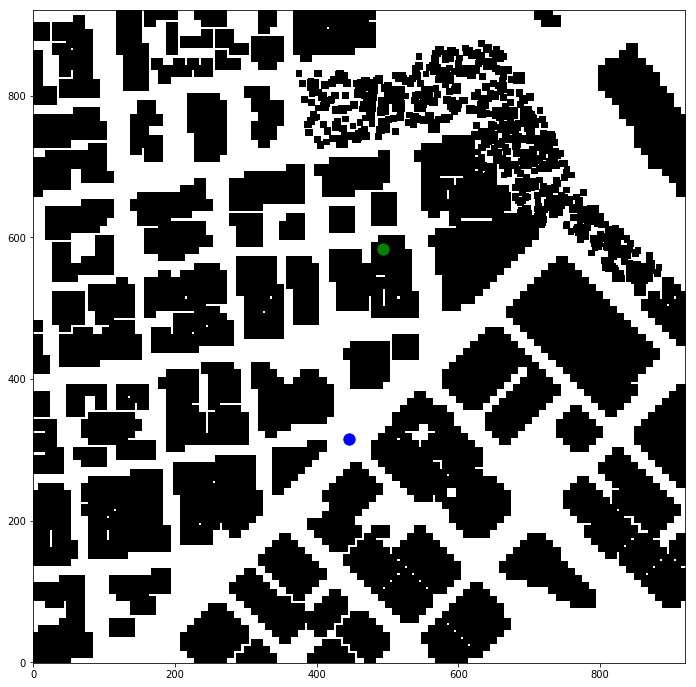

In [30]:
from planner import Planner, GpsLocation
from udacidrone.frame_utils import global_to_local, local_to_global

p = Planner()
p.load_map()
grid = p.create_grid()
grid25 = p.grid25
n_min = p.north_min
e_min = p.east_min

lon0 = -122.397450
lat0 = 37.792480
global_home = (lon0, lat0, 0)

start = (0,0,0)
#goal_gps = GpsLocation(37.794719, -122.396987, 0)
goal_gps = GpsLocation(37.79489867, -122.39687191, 0)
goal = global_to_local(goal_gps, global_home)
goal = np.array([int(goal[0]), int(goal[1]), 0])

# goal = (248.67913418 + 20, 49.16487749,0.)
# print(local_to_global(goal, global_home))
# print(local_to_global((goal[0], goal[1] + 6, 0), global_home))

print('Start: ', start)
print('Goal: ', goal)
print('Grid[Goal]', grid[goal[0], goal[1]])

fig = plt.figure()

plt.imshow(grid, cmap='Greys', origin='lower')
plt.scatter(start[1] - e_min, start[0] - n_min, marker='o', s = 128, color='blue')
plt.scatter(goal[1] - e_min, goal[0] - n_min, marker='o', s = 128, color='green')

plt.show()

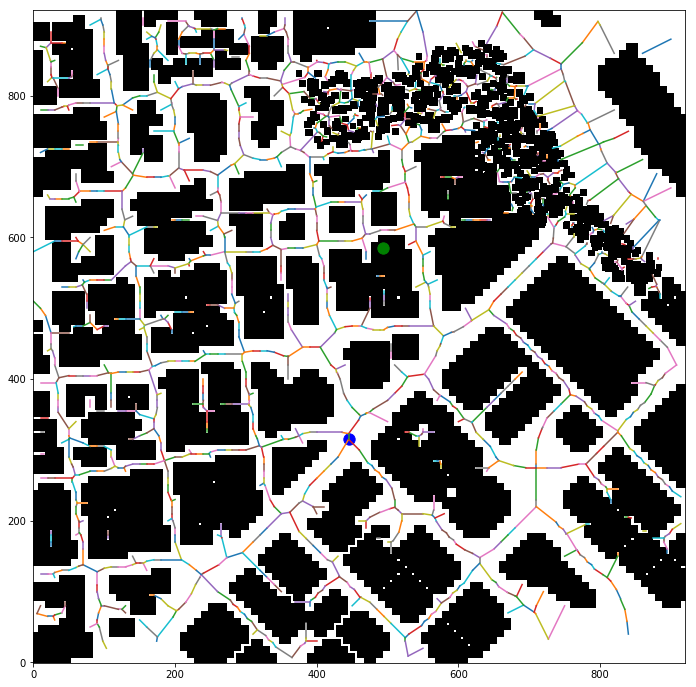

In [19]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]

edges = p.get_voronoi_edges()

fig = plt.figure()
plt.imshow(grid, cmap='Greys', origin='lower')

for y1, x1, y2, x2 in edges:
     plt.plot([x1, x2], [y1, y2])

plt.scatter(start[1] - e_min, start[1] - n_min, color='blue', s = 128)
plt.scatter(goal[1] - e_min, goal[0] - n_min, color='green', s = 128)

plt.show()

Start:  (0, 0, 0)
Goal:  [ 268.67895647   49.16698944    0.        ]
Closest To Start (0, 0, 0) is (-1, 0, -5)
Closest To Goal [ 268.67895647   49.16698944    0.        ] is (264, 25, -5) 
Running a_star
Found a path.
Pruning path...
Path pruned. Length:  28
Since closest goal is not on the graph, using action based planner for last node...
Start: (268, 49, 0), Goal: (264, 25, -5)
Current equals goal, going out


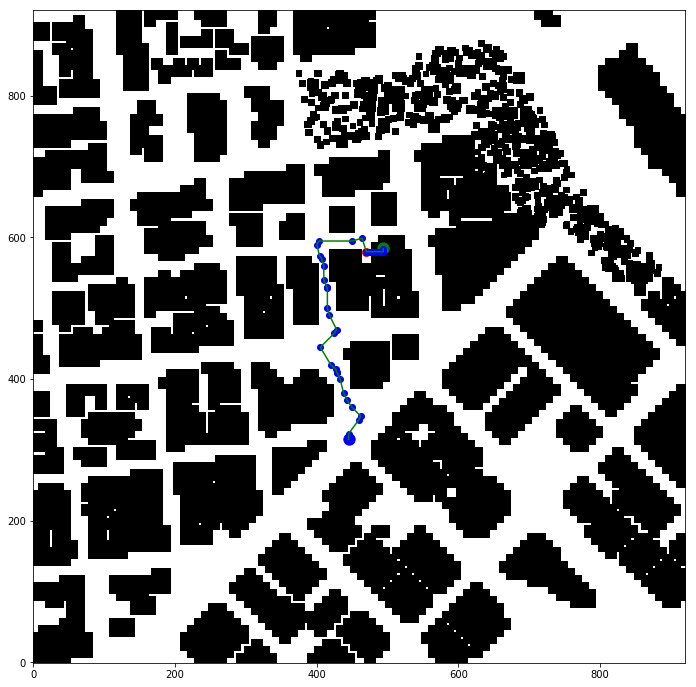

In [26]:
print('Start: ', start)
print('Goal: ', goal)

path2d_cost = p.plan_route(start, goal)

fig = plt.figure()

plt.imshow(grid, cmap='Greys', origin='lower')
plt.scatter(start[1] - e_min, start[0] - n_min, marker='o', s = 128, color='blue')
plt.scatter(goal[1] - e_min, goal[0] - n_min, marker='o', s = 128, color='green')

plt.scatter(p.c_goal[1] - e_min, p.c_goal[0] - n_min, marker='o', s = 64, color='red')

x = []
y = []
for point in path2d_cost:
    plt.scatter(point[1] - e_min, point[0] - n_min, color='blue')
    x.append(point[1] - e_min)
    y.append(point[0] - n_min)

plt.plot(x, y, color='green')
plt.show()

# Start to Goal with Voronoi

# create_voronoi_graph

## Graph Nodes

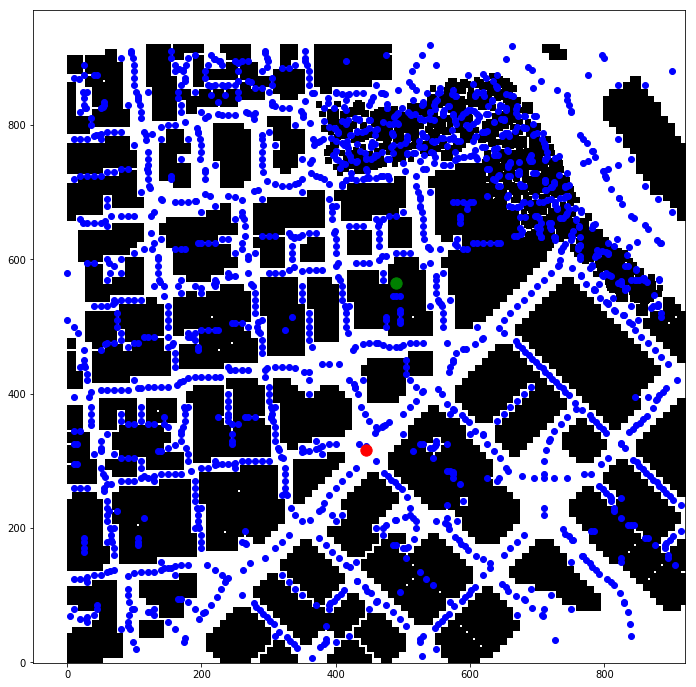

In [14]:
import os

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]

graph, t = p.create_voronoi_graph()

#print(dir(graph))
fig = plt.figure()
plt.imshow(grid, cmap='Greys', origin='lower')

f = open('check.txt', "w")

graph_list = list(graph)
for n in graph_list:
    plt.scatter(n[1] - e_min, n[0] - n_min, color='blue')
    f.write(str(n))
#     print(n)

f.close()

plt.scatter(start[1] - e_min, start[1] - n_min, color='red', s = 128)
plt.scatter(goal[1] - e_min, goal[0] - n_min, color='green', s = 128)

plt.show()

## Check Closest To Goal (using tree)

[[1360 1361 1359  616  348 1358  345  347  620  993]]


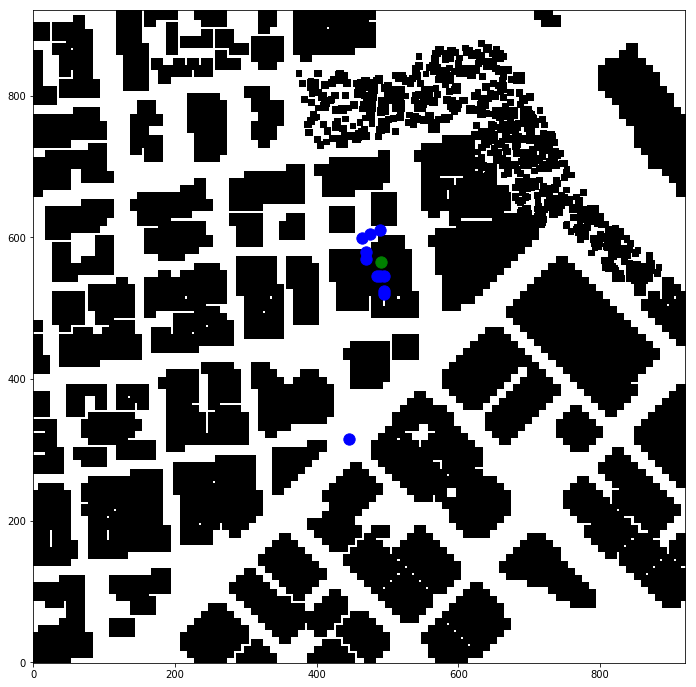

In [25]:
graph_list = list(graph)
# cg_index = t.query([[goal[0], goal[1], 0]], k = 1, return_distance = False)
cg_index = t.query([[goal[0], goal[1], 0]], k = 10, return_distance = False)
print(cg_index)

# print('Node closes to goal: ', cg)

fig = plt.figure()
plt.imshow(grid, cmap='Greys', origin='lower')

for n in cg_index[0]:
    cg = graph_list[n]
    plt.scatter(cg[1] - e_min, cg[0] - n_min, color='blue', s = 128)


plt.scatter(start[1] - e_min, start[0] - n_min, color='blue', s = 128)
plt.scatter(goal[1] - e_min, goal[0] - n_min, color='green', s = 128)

plt.show()

# Path from Start to Goal

In [27]:
fig = plt.figure()
plt.imshow(grid, cmap='Greys', origin='lower')
plt.scatter(start[1] - e_min, start[0] - n_min, marker='o', s = 128, color='green')
plt.scatter(goal[1] - e_min, goal[0] - n_min, marker='o', s = 128, color='red')

for point in path2d_cost:
    plt.plot(point[1] - e_min, point[0])
    
plt.show()

for y, x, _, _ in path2d_cost:
    y -= n_min
    x -= e_min

445 315
445 323
459 342
462 348
450 360
443 370
438 380
433 400
429 409
428 410
427 414
420 420
405 445
425 465
428 470
418 490
415 500
415 528
414 530
410 540
410 560
407 570
404 574
400 590
403 595
450 595
464 599
470 580
470 570
470 570
470 570
470 570
470 570
470 570
470 570
470 570
470 570
470 570
470 570
470 570
470 570
470 570
470 569
470 568
470 567
470 566
470 565
470 564
471 564
472 564
473 564
474 564
475 564
476 564
477 564
478 564
479 564
480 564
481 564
482 564
483 564
484 564
484 564


In [18]:
from sklearn.neighbors import KDTree

x = [(100, 20), (300, 20), (200, 10)]
print(x)

t = KDTree(x)
tc = t.query([(200,9)], k = 1, return_distance = False)

print(tc)
print(x[tc[0][0]])


[(100, 20), (300, 20), (200, 10)]
[[2]]
(200, 10)
